# Assignment #07

### Import Libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import io
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load Dataset

In [10]:
data=pd.read_csv("./datasets/housing.csv")

## Perform EDA on the Dataset

### Display Head

In [11]:
# Display the first few rows of the dataset
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


In [12]:
data.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11,2640,505.0,1257,445,3.5673,112000,INLAND
20631,-121.40,39.33,15,2655,493.0,1200,432,3.5179,107200,INLAND
20632,-121.45,39.26,15,2319,416.0,1047,385,3.1250,115600,INLAND
20633,-121.53,39.19,27,2080,412.0,1082,382,2.5495,98300,INLAND
20634,-121.56,39.27,28,2332,395.0,1041,344,3.7125,116800,INLAND
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


### Summary statistics

In [13]:
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

### Data Types of Columns

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [15]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [16]:
data.iloc[500]

longitude              -122.27
latitude                 37.85
housing_median_age          52
total_rooms               1974
total_bedrooms           426.0
population                 875
households                 363
median_income           1.5817
median_house_value      153600
ocean_proximity       NEAR BAY
Name: 500, dtype: object

In [17]:
data.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [18]:
data.corr()

ValueError: could not convert string to float: 'NEAR BAY'

### Explore categorical features

In [ ]:
print("\nCount of unique values in categorical features:")
print(data.select_dtypes(include='object').nunique())


Count of unique values in categorical features:
ocean_proximity    5
dtype: int64


### Visualization and explore the data using seaborn

<Axes: >

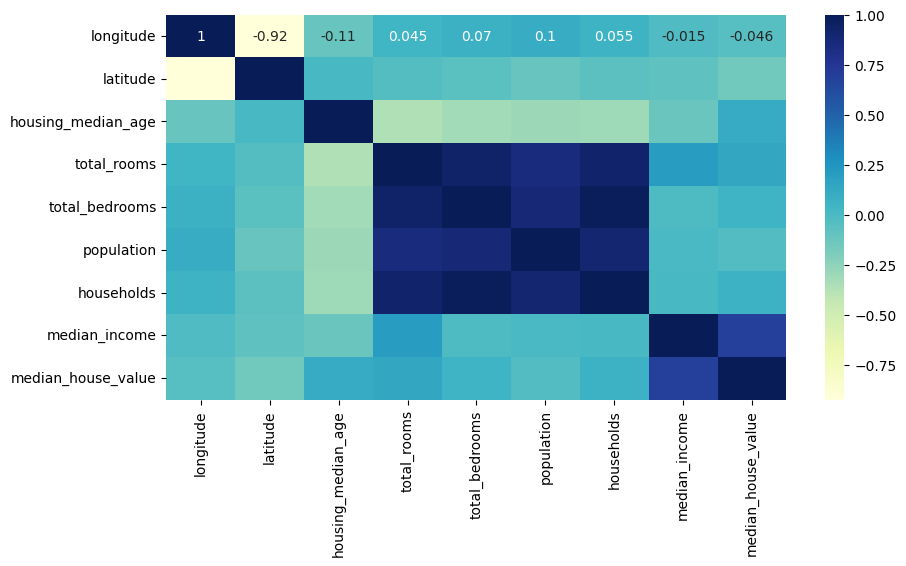

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 5))
correlate = numeric_data.corr()
sns.heatmap(correlate, cmap='YlGnBu', annot=True)

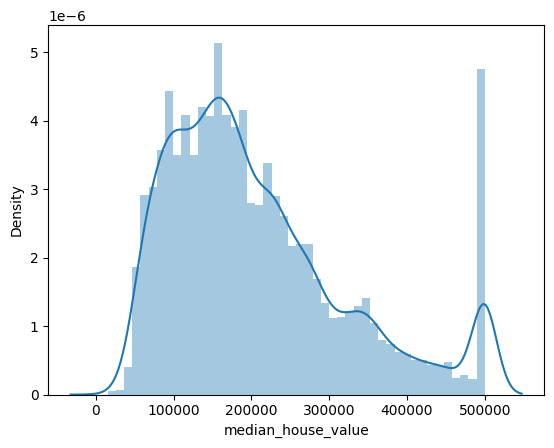

In [ ]:
sns.distplot(data["median_house_value"])
plt.show()

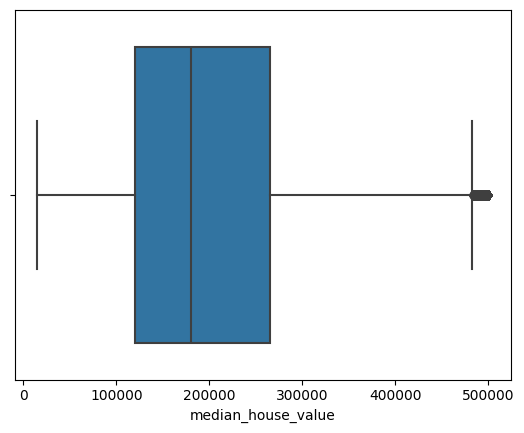

In [ ]:
sns.boxplot(x=data["median_house_value"])
plt.show()

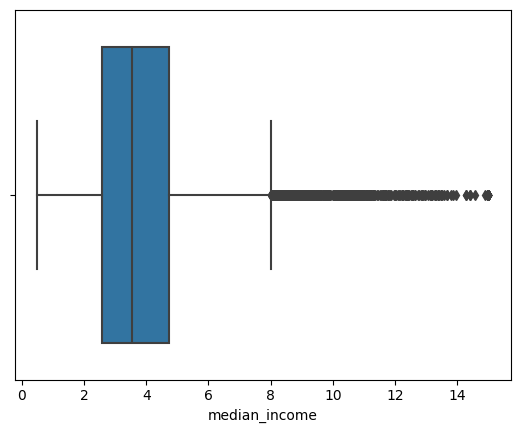

In [ ]:
sns.boxplot(x=data["median_income"])
plt.show()

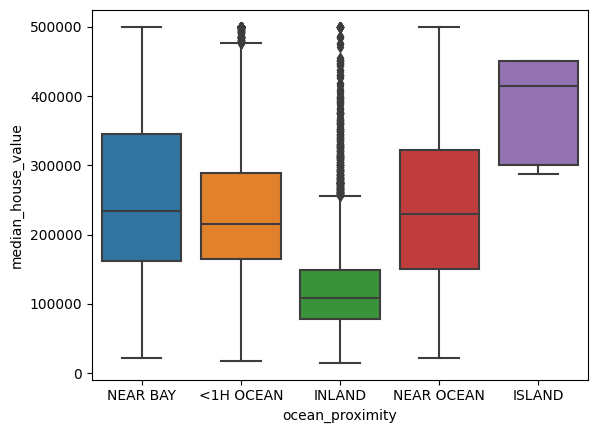

In [ ]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=data)
plt.show()

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

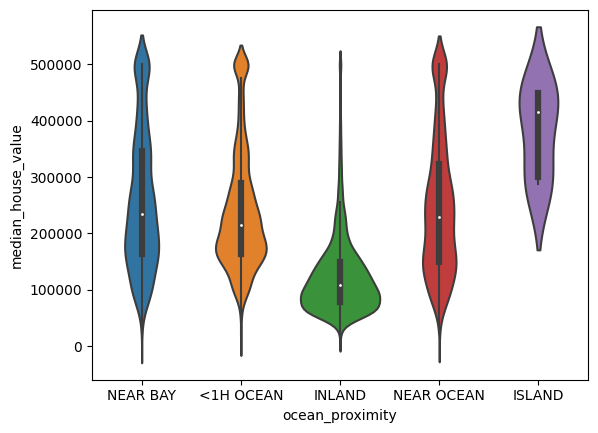

In [ ]:
sns.violinplot(x="ocean_proximity", y="median_house_value", data=data)

<Axes: xlabel='ocean_proximity', ylabel='count'>

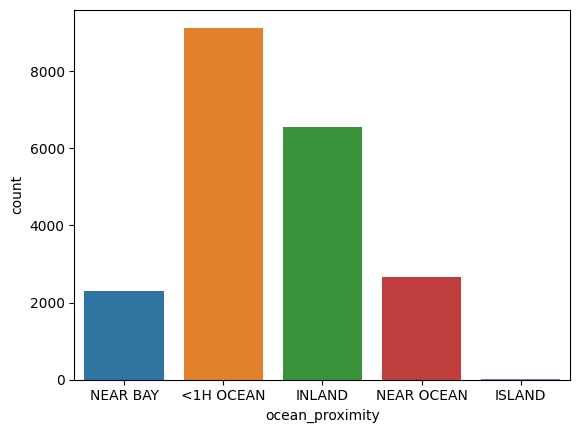

In [ ]:
sns.countplot(x="ocean_proximity",  data=data)

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

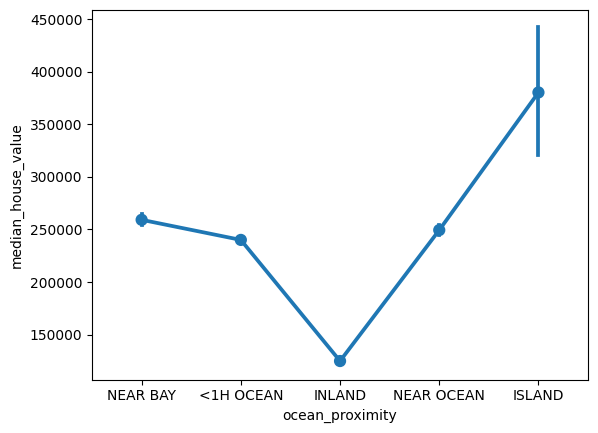

In [ ]:
sns.pointplot(x="ocean_proximity", y="median_house_value", data=data, estimator='mean' )

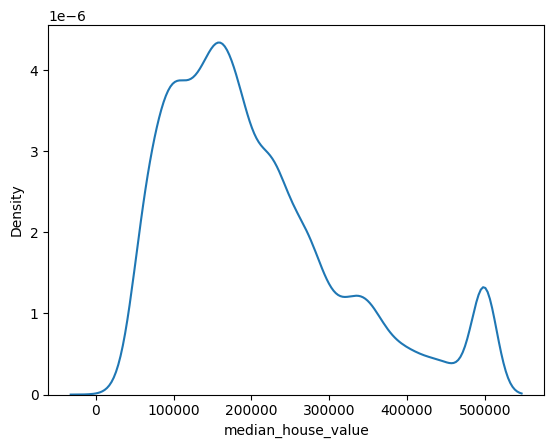

In [ ]:
sns.kdeplot(data['median_house_value'])
plt.show()

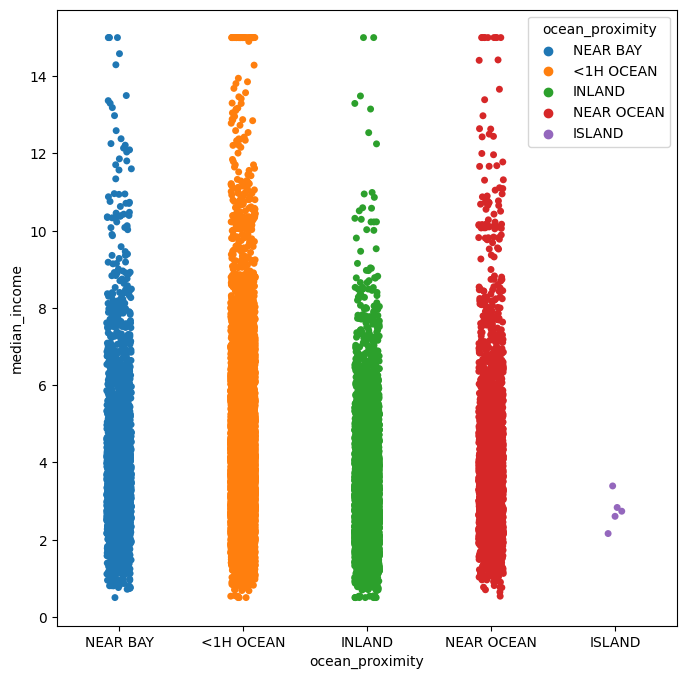

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(x="ocean_proximity", y="median_income",hue='ocean_proximity', data=data)
plt.show()

<Axes: xlabel='median_house_value', ylabel='median_income'>

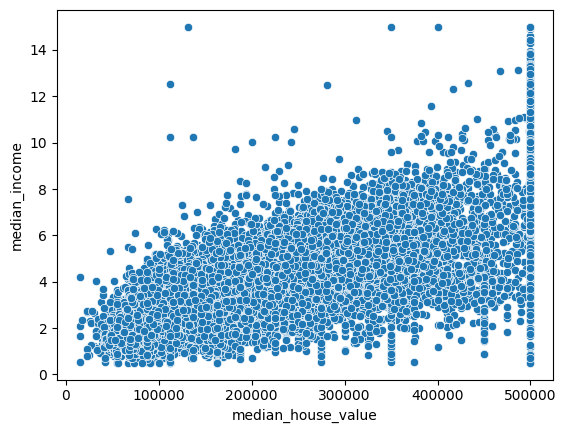

In [ ]:
sns.scatterplot(x='median_house_value', y='median_income', data=data)

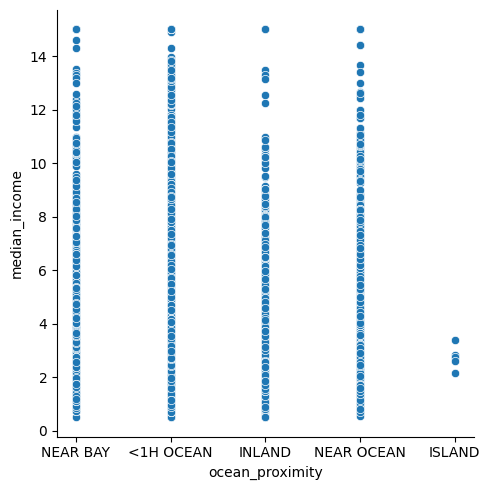

In [ ]:
sns.relplot(x='ocean_proximity', y='median_income', data=data, kind='scatter')

### Clean the dataset, remove the missing values 

In [ ]:
missing_value=data.isnull().sum()
print(missing_value)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
data_cleaned = data.dropna()
print(data_cleaned.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Separate the target variable from the data set. 

In [ ]:
target_median_house_data=data_cleaned["median_house_value"]
target_median_income=data_cleaned['median_income']

In [ ]:
# Remove the target variables from the dataset
data = data_cleaned.drop(['median_house_value', 'median_income'], axis=1)

## Use the Scikit Learn Library to fit the Classification model 

In [19]:
data=pd.read_csv("./datasets/housing.csv")
data['is_high_value'] = (data['median_house_value'] > 200000).astype(int)

In [20]:
# Drop rows with missing values
data = data.dropna()

In [21]:
# Create dummy variables for the 'ocean_proximity' column
ocean_proximity = pd.get_dummies(data['ocean_proximity'], drop_first=True)

In [22]:
# Concatenate the dummy variables with the original data and drop the original 'ocean_proximity' column
data = pd.concat([data, ocean_proximity], axis=1)
data.drop(['ocean_proximity', 'median_house_value'], axis=1, inplace=True)

In [23]:
# Define features and target
X = data.drop('is_high_value', axis=1)
y = data['is_high_value']

In [24]:
data.shape

(20433, 13)

In [25]:
data.select_dtypes(['category']).columns

Index([], dtype='object')

In [26]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,is_high_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,1,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,1,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,1,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,1,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,1,False,False,True,False


### Split the data into train test sets

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [29]:
X_train.shape
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5811,-118.26,34.13,37,1383,470.0,1185,451,2.5000,False,False,False,False
18444,-121.81,37.25,5,1975,520.0,861,440,4.4565,False,False,False,False
5928,-117.80,34.10,13,2996,495.0,1187,464,6.2456,True,False,False,False
15955,-122.45,37.71,52,1658,322.0,1086,326,3.8583,False,False,False,True
9008,-118.60,34.08,40,866,181.0,399,176,6.9100,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5757,-118.28,34.18,50,2195,336.0,878,309,6.8840,False,False,False,False
8093,-118.21,33.82,45,455,92.0,394,89,4.9562,False,False,False,True
17914,-121.99,37.36,32,1754,324.0,917,330,4.6761,False,False,False,False
18103,-122.04,37.30,25,2366,417.0,1076,398,6.9238,False,False,False,False


In [30]:
y_train.shape
y_train

5811     1
18444    0
5928     0
15955    1
9008     1
        ..
5757     1
8093     0
17914    1
18103    1
13274    0
Name: is_high_value, Length: 16346, dtype: int32

In [31]:
X_test.shape
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14561,-117.22,32.83,17,1124,187.0,553,205,5.7451,False,False,False,True
1571,-122.01,37.83,30,3917,549.0,1330,544,6.5617,False,False,True,False
4201,-118.24,34.11,39,1148,348.0,1161,333,2.2167,False,False,False,False
4670,-118.29,34.05,18,3585,1661.0,5229,1534,1.8470,False,False,False,False
6251,-117.97,34.04,32,1507,295.0,1326,324,4.1190,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12255,-117.02,33.76,20,1317,203.0,453,158,2.8393,True,False,False,False
8544,-118.36,33.88,22,1388,336.0,930,287,2.7981,False,False,False,False
7513,-118.26,33.90,38,1566,318.0,981,318,4.0234,False,False,False,False
16766,-122.48,37.69,33,2347,512.0,1259,481,3.4492,False,False,False,True


In [32]:
y_test.shape
y_test

14561    1
1571     1
4201     0
4670     1
6251     0
        ..
12255    0
8544     1
7513     0
16766    1
17048    1
Name: is_high_value, Length: 4087, dtype: int32

### Use logistic regression to train the model

In [33]:
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Test the model and display the accuracy of the model

In [37]:
# Predict
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [39]:
print('Classification Model')
print('--' * 40)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

Classification Model
--------------------------------------------------------------------------------
Accuracy: 0.7878639588940544
Confusion Matrix:
 [[1953  393]
 [ 474 1267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      2346
           1       0.76      0.73      0.75      1741

    accuracy                           0.79      4087
   macro avg       0.78      0.78      0.78      4087
weighted avg       0.79      0.79      0.79      4087

